In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('dataset - Copy.xlsx')

In [4]:
df.head()

,,Total expenses,"Raw materials, stores & spares",Packaging and packing expenses,Purchase of finished goods,Indirect taxes,Selling & distribution expenses,Non-executive directors' fees,Financial services expenses,Provisions,Write-offs,Amortisation,Other expenses transferred to DRE
0,1988-12-01,9586.9,6126.4,NaN,NaN,1891.5,278.7,NaN,416.7,4.6,NaN,NaN,NaN
1,1989-12-01,12112.2,7444.9,NaN,NaN,2916.9,351.0,NaN,377.9,2.2,NaN,NaN,NaN
2,1990-12-01,15520.6,8874.0,NaN,NaN,4657.8,284.8,NaN,474.1,3.1,NaN,NaN,NaN
3,1991-12-01,19540.2,10830.2,NaN,NaN,5909.3,554.1,NaN,928.8,2.1,NaN,21.6,NaN
4,1992-12-01,22028.0,12799.2,NaN,NaN,6515.5,571.5,NaN,751.3,7.3,NaN,27.0,NaN


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

                                      0
Total expenses                        0
Raw materials, stores & spares        0
Packaging and packing expenses       36
Purchase of finished goods           15
Indirect taxes                        0
Selling & distribution expenses       0
Non-executive directors' fees        35
Financial services expenses           0
Provisions                           13
Write-offs                           13
Amortisation                         22
Other expenses transferred to DRE    36
dtype: int64

There are some columns which have null values but we cannot do imputation and add mean values because
that would lead to problems in the total of expenses. So checking the columns which have more null values and if they have only null values we will delete it.

In [7]:
# it only has value in one row so we will delete it
df["Non-executive directors' fees"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    4.5
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
30    NaN
31    NaN
32    NaN
33    NaN
34    NaN
35    NaN
Name: Non-executive directors' fees, dtype: float64

In [8]:
# there are no values at all so it will be deleted.
df["Other expenses transferred to DRE"].sum()

0.0

In [9]:
# no values so it will also be deleted.
df["Packaging and packing expenses"].sum()

0.0

In [10]:
df.drop(columns = ["Non-executive directors' fees","Other expenses transferred to DRE",
        "Packaging and packing expenses"], inplace = True)

Naming the first column and also setting it as index

In [11]:
df.columns.values[0] = "Year"

In [12]:
df.head()

,Year,Total expenses,"Raw materials, stores & spares",Purchase of finished goods,Indirect taxes,Selling & distribution expenses,Financial services expenses,Provisions,Write-offs,Amortisation
0,1988-12-01,9586.9,6126.4,NaN,1891.5,278.7,416.7,4.6,NaN,NaN
1,1989-12-01,12112.2,7444.9,NaN,2916.9,351.0,377.9,2.2,NaN,NaN
2,1990-12-01,15520.6,8874.0,NaN,4657.8,284.8,474.1,3.1,NaN,NaN
3,1991-12-01,19540.2,10830.2,NaN,5909.3,554.1,928.8,2.1,NaN,21.6
4,1992-12-01,22028.0,12799.2,NaN,6515.5,571.5,751.3,7.3,NaN,27.0


In [13]:
# replacing "NaN" with "0.0"
df.fillna(0.0, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Year                             36 non-null     datetime64[ns]
 1   Total expenses                   36 non-null     float64       
 2   Raw materials, stores & spares   36 non-null     float64       
 3   Purchase of finished goods       36 non-null     float64       
 4   Indirect taxes                   36 non-null     float64       
 5   Selling & distribution expenses  36 non-null     float64       
 6   Financial services expenses      36 non-null     float64       
 7   Provisions                       36 non-null     float64       
 8   Write-offs                       36 non-null     float64       
 9   Amortisation                     36 non-null     float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 2.9 KB


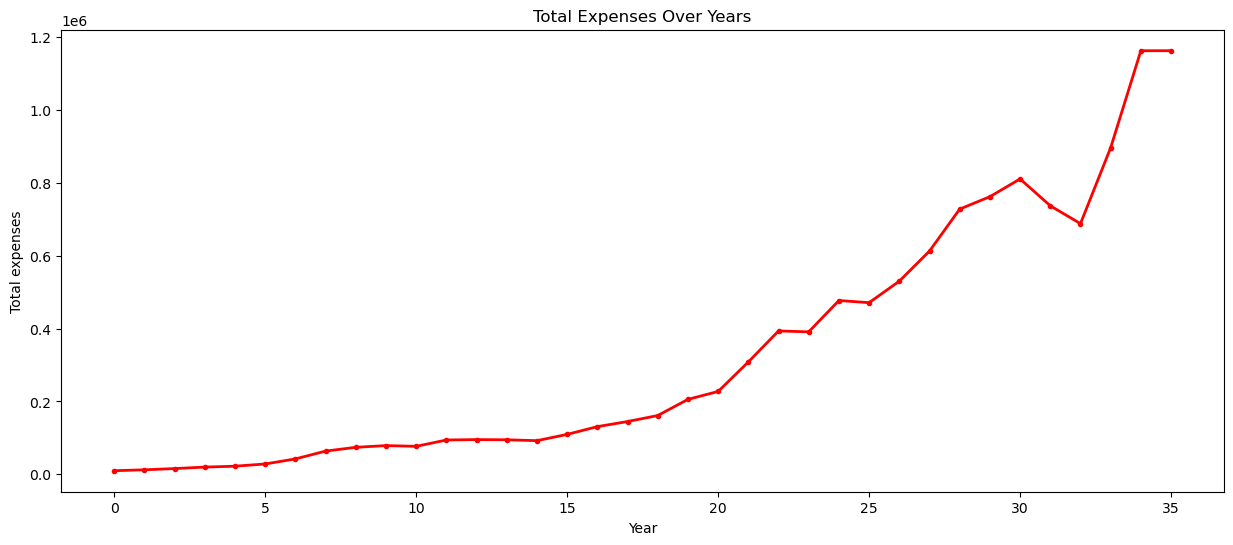

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,6))

plt.plot(df.index, df['Total expenses'], c='red', lw=2, marker=".")
plt.xlabel('Year')
plt.ylabel('Total expenses')
plt.title('Total Expenses Over Years')
plt.show()

From the graph we can see there is an increase in the Total Expenses over the years.

Now our Total Expenses depend on all the other expenses which are in the dataset. So all the other are indepedent variable and Total Expenses is dependent

In [17]:
# Independent variable
x = df.iloc[:,2:]
x.head(2)

,"Raw materials, stores & spares",Purchase of finished goods,Indirect taxes,Selling & distribution expenses,Financial services expenses,Provisions,Write-offs,Amortisation
0,6126.4,0.0,1891.5,278.7,416.7,4.6,0.0,0.0
1,7444.9,0.0,2916.9,351.0,377.9,2.2,0.0,0.0


In [19]:
y = df.iloc[:,1:2]
y.head(2)

,Total expenses
0,9586.9
1,12112.2


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x ,y ,test_size= 0.2, random_state = 1)

In [34]:
# from sklearn.preprocessing import StandardScaler

# ss = StandardScaler()
# x_train_scaled = ss.fit_transform(x_train)
# x_test_scaled = ss.transform(x_test)

### Multi-Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression()

In [22]:
print('Regression Coefficients: ', mlr.coef_)
print('Y Intercept: ', mlr.intercept_)

Regression Coefficients:  [[ 1.23196875  1.39783262  0.85956668 -0.26338008  0.63113093 -6.68478271
  14.34324908 -0.16054202]]
Y Intercept:  [2162.50702303]


In [23]:
y_pred_mlr = mlr.predict(x_test)

In [48]:
from sklearn.metrics import r2_score
r2_score_mlr = r2_score(y_test, y_pred_mlr)*100

### Polynomial Regression

In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree = 3)
x_poly_train = poly_feat.fit_transform(x_train)
x_poly_test = poly_feat.transform(x_test)

In [44]:
from sklearn.linear_model import LinearRegression
poly_reg = LinearRegression()
poly_reg.fit(x_poly_train,y_train)

LinearRegression()

In [45]:
y_pred_pol = poly_reg.predict(x_poly_test)

In [47]:
r2_score_poly = r2_score(y_test,y_pred_pol)*100

### Support Vector Regressor

#### Kernel = 'Linear'

In [52]:
from sklearn.svm import SVR
svrm = SVR(kernel = 'linear')
svrm.fit(x_train, y_train)

C:\Users\Abhinav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [53]:
y_pred_svr = svrm.predict(x_test)

In [56]:
r2_score_svrl = r2_score(y_test,y_pred_svr)*100

#### Kernel = RBF/Gaussian 

In [57]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train, y_train)

C:\Users\Abhinav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [58]:
y_pred_svrg = svr.predict(x_test)

In [65]:
r2_score_svrg = r2_score(y_test,y_pred_svrg)*100

#### Kernel = 'Poly'

In [61]:
from sklearn.svm import SVR
svrp = SVR(kernel = 'poly', degree = 2)
svrp.fit(x_train, y_train)

C:\Users\Abhinav\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(degree=2, kernel='poly')

In [62]:
y_pred_svrp = svrp.predict(x_test)

In [66]:
r2_score_svrp = r2_score(y_test,y_pred_svrp)*100

### Decision Tree Regressor

In [67]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [68]:
y_pred_dtr = dtr.predict(x_test)

In [69]:
r2_score(y_test, y_pred_dtr)*100

95.70467347848121